In [1]:
import glob
import shutil
import time
import os
from distutils.dir_util import copy_tree

import cv2
from PIL import Image, ImageOps

In [2]:
SOURCE_DIR = "car_ims_backup"
NEW_DIR = "car_ims_buffer"
copy_tree(SOURCE_DIR, NEW_DIR)

['car_ims_buffer/003301.jpg',
 'car_ims_buffer/013112.jpg',
 'car_ims_buffer/005770.jpg',
 'car_ims_buffer/015563.jpg',
 'car_ims_buffer/001516.jpg',
 'car_ims_buffer/011705.jpg',
 'car_ims_buffer/006279.jpg',
 'car_ims_buffer/008254.jpg',
 'car_ims_buffer/007167.jpg',
 'car_ims_buffer/000608.jpg',
 'car_ims_buffer/008532.jpg',
 'car_ims_buffer/007601.jpg',
 'car_ims_buffer/011063.jpg',
 'car_ims_buffer/001270.jpg',
 'car_ims_buffer/015205.jpg',
 'car_ims_buffer/002779.jpg',
 'car_ims_buffer/005016.jpg',
 'car_ims_buffer/004308.jpg',
 'car_ims_buffer/013674.jpg',
 'car_ims_buffer/003467.jpg',
 'car_ims_buffer/015211.jpg',
 'car_ims_buffer/005002.jpg',
 'car_ims_buffer/013660.jpg',
 'car_ims_buffer/003473.jpg',
 'car_ims_buffer/010369.jpg',
 'car_ims_buffer/008526.jpg',
 'car_ims_buffer/007615.jpg',
 'car_ims_buffer/009638.jpg',
 'car_ims_buffer/011077.jpg',
 'car_ims_buffer/001264.jpg',
 'car_ims_buffer/001502.jpg',
 'car_ims_buffer/011711.jpg',
 'car_ims_buffer/008240.jpg',
 'car_ims_

In [3]:
files_list = glob.glob(f"{NEW_DIR}{os.sep}*.jpg")
len(files_list)

16185

In [4]:
row_number, column_number = 64, 64

# OpenCV

In [5]:
opencv_list = []

In [6]:
matrix_list = []

### Чтение изображений

In [7]:
start_time = time.time()
for file in files_list:
    matrix_list.append(cv2.imread(file, cv2.IMREAD_UNCHANGED))
res = time.time()-start_time
print("Время выполнения", res)
opencv_list.append(res)

Время выполнения 65.86972689628601


### Сжатие изображений

In [8]:
start_time = time.time()
for img in matrix_list:
    cv2.resize(img, (row_number, column_number), interpolation = cv2.INTER_AREA)
res = time.time()-start_time
print("Время выполнения", res)
opencv_list.append(res)

Время выполнения 107.78270483016968


### Перевод в оттенки серого

In [9]:
start_time = time.time()
for img in matrix_list:
    if len(img.shape) == 3:
        cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
res = time.time()-start_time
print("Время выполнения", res)
opencv_list.append(res)

Время выполнения 67.82907795906067


In [10]:
opencv_list

[65.86972689628601, 107.78270483016968, 67.82907795906067]

# Pillow

In [11]:
pillow_list = []

In [12]:
matrix_list = []

### Чтение изображений

In [13]:
start_time = time.time()
for file in files_list:
    temp = Image.open(file)
    matrix_list.append(temp.copy())
    temp.close()
res = time.time()-start_time
print("Время выполнения", res)
pillow_list.append(res)

Время выполнения 74.61858820915222


### Сжатие изображений

In [14]:
start_time = time.time()
for img in matrix_list:
    buf = img.resize((row_number, column_number), Image.ANTIALIAS)
res = time.time()-start_time
print("Время выполнения", res)
pillow_list.append(res)

Время выполнения 132.679771900177


### Перевод в оттенки серого

In [15]:
start_time = time.time()
for img in matrix_list:
    gray_image = ImageOps.grayscale(img)
res = time.time()-start_time
print("Время выполнения", res)
pillow_list.append(res)

Время выполнения 101.95378613471985


In [16]:
pillow_list

[74.61858820915222, 132.679771900177, 101.95378613471985]

# График сравнения

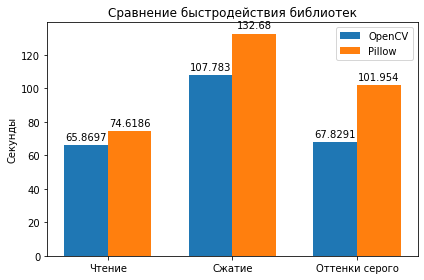

In [47]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Чтение', 'Сжатие', 'Оттенки серого']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, opencv_list, width, label='OpenCV')
rects2 = ax.bar(x + width/2, pillow_list, width, label='Pillow')

ax.set_ylabel('Секунды')
ax.set_title('Сравнение быстродействия библиотек')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.savefig('./img/plot1.png')
plt.show()

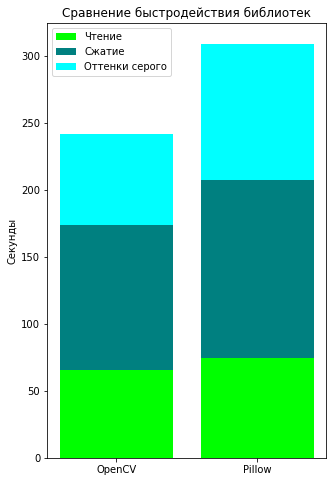

In [48]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 8))
# create data
x = ['OpenCV', 'Pillow']
y1 = np.array([opencv_list[0], pillow_list[0]])
y2 = np.array([opencv_list[1], pillow_list[1]])
y3 = np.array([opencv_list[2], pillow_list[2]])

# plot bars in stack manner
plt.bar(x, y1, color='lime')
plt.bar(x, y2, bottom=y1, color='teal')
plt.bar(x, y3, bottom=y1+y2, color='cyan')

plt.ylabel("Секунды")
plt.title('Сравнение быстродействия библиотек')
plt.legend(labels)

plt.savefig('./img/plot2.png')
plt.show()